In [1]:
# * Problem Difinition
# * Data
# * Evaluate
# * Feature
# * Modelling
# * Experimentations

In [2]:
# 1-Problem Difinition
# > Base on the given data we need to predict if a patient has heart disease or not.

In [3]:
# 2-data


In [4]:
# 3-Evaluate
#> In initial stages we need to make sure, if our model gives us the accuracy of 95%

In [5]:
# 4-Features
# what features are import, what feature columns means what ?

### Modelling
#### Tools Prepairation

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import Models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Evaluation Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve

### Exploring the Data Initial Stage
#### 1- What problem i am going to solve
#### 2- what kind of data i have
#### 3- Does this data have missing values
#### 4- Are there any outlier, sporious vectors
#### 5- Can we add or remove some of the features

In [7]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

In [9]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

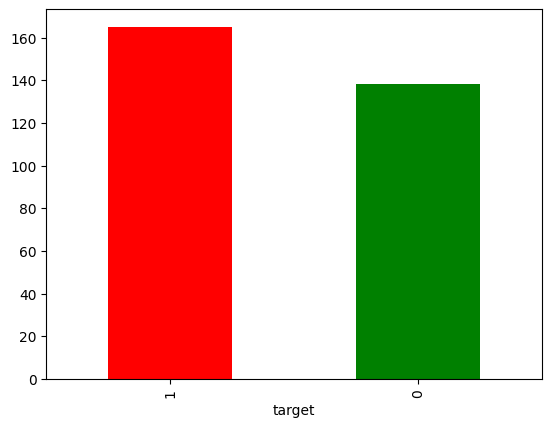

In [10]:
df['target'].value_counts().plot(kind='bar',color=['red','green'])

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

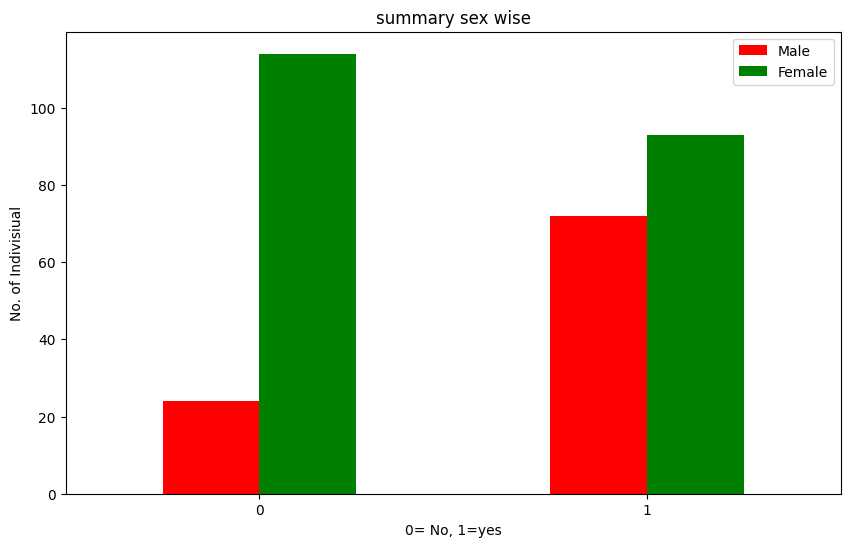

In [16]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize = (10,6),color=['red','green'])
plt.title('summary sex wise')
plt.xlabel('0= No, 1=yes')
plt.ylabel('No. of Indivisiual')
plt.legend(['Male','Female'])
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '71'),
  Text(1, 0, '88'),
  Text(2, 0, '90'),
  Text(3, 0, '95'),
  Text(4, 0, '96'),
  Text(5, 0, '97'),
  Text(6, 0, '99'),
  Text(7, 0, '103'),
  Text(8, 0, '105'),
  Text(9, 0, '106'),
  Text(10, 0, '108'),
  Text(11, 0, '109'),
  Text(12, 0, '111'),
  Text(13, 0, '112'),
  Text(14, 0, '113'),
  Text(15, 0, '114'),
  Text(16, 0, '115'),
  Text(17, 0, '116'),
  Text(18, 0, '117'),
  Text(19, 0, '118'),
  Text(20, 0, '120'),
  Text(21, 0, '121'),
  Text(22, 0, '122'),
  Text(23, 0, '123'),
  Text(24, 0, '124'),
  Text(25, 0, '125'),
  Text(26, 0, '126'),
  Text(27

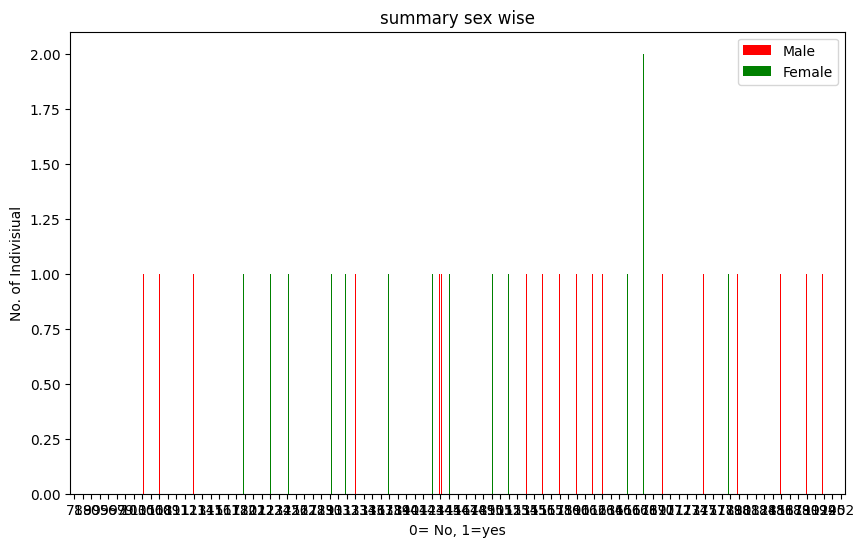

In [17]:
pd.crosstab(df.thalach,df.age).plot(kind='bar',figsize = (10,6),color=['red','green'])
plt.title('summary sex wise')
plt.xlabel('0= No, 1=yes')
plt.ylabel('No. of Indivisiual')
plt.legend(['Male','Female'])
plt.xticks(rotation=0)

In [18]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

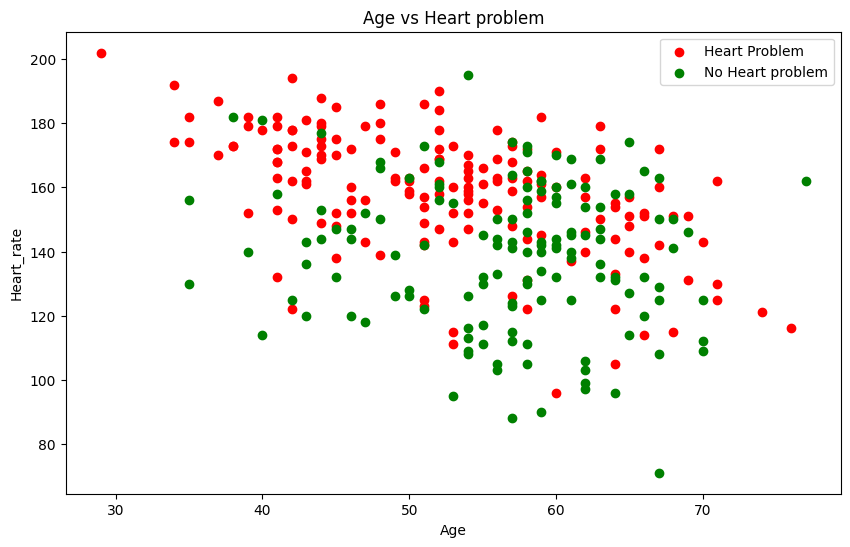

In [20]:
# Finding Patterns in Data using Scatter Plot
plt.figure(figsize=(10,6))
# Create scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color='red')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='green')
plt.title('Age vs Heart problem')
plt.xlabel('Age')
plt.ylabel('Heart_rate')
plt.legend(['Heart Problem','No Heart problem'])

<Axes: ylabel='Frequency'>

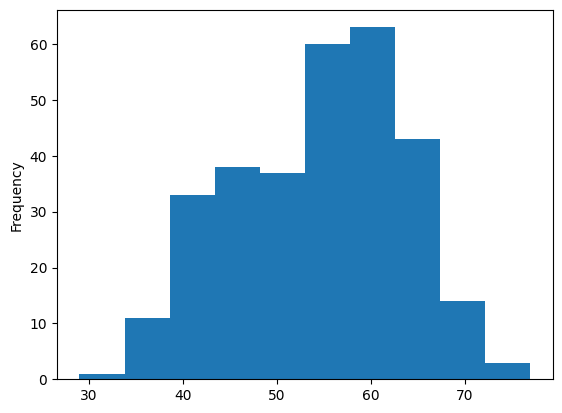

In [21]:
# Create Histogram to see age Distribution
df.age.plot.hist()

In [22]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [23]:
# cp: chest pain type
# value 0: typical angina(chest pain due to decrease blood pressure)
# value 1: atypical angina(Chest pain not related to heart problem)
# value 2: non-anginal pain(Not heart related)
# value 3: asymptomatic(chest pain not showing heart problem)

In [24]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


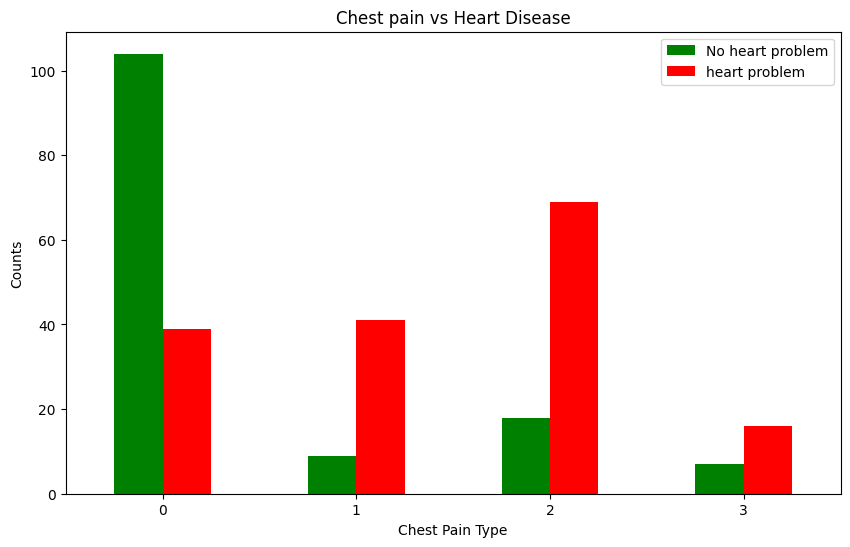

In [25]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['green','red'])
plt.title('Chest pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(['No heart problem','heart problem'])
plt.xticks(rotation=0);

### Correlation Matrix

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


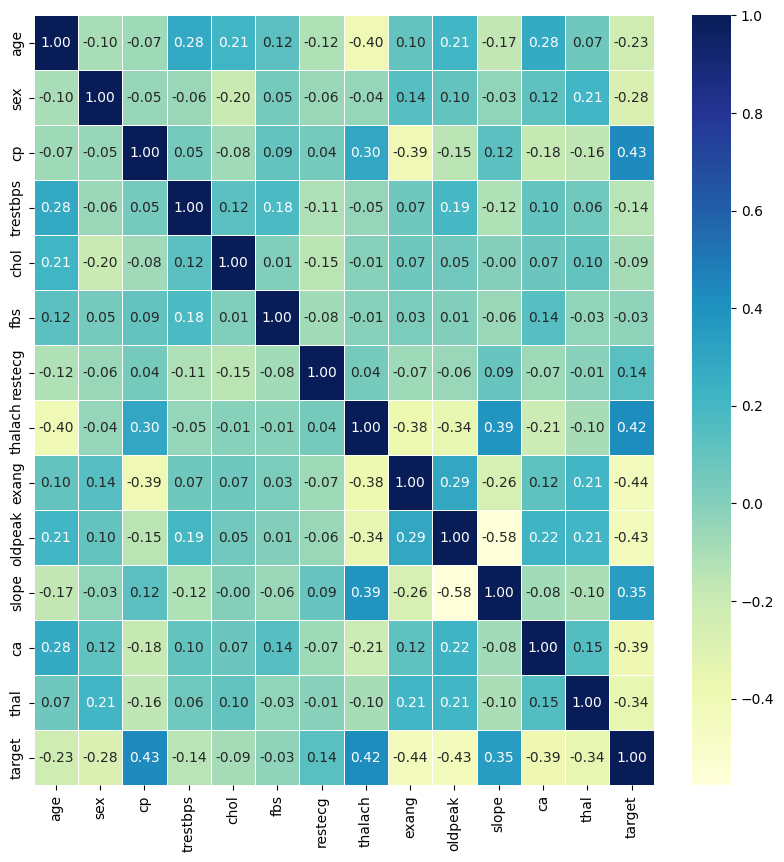

In [28]:
# visualization 
cor_map = df.corr()
home,room = plt.subplots(figsize = (10,10))
room = sns.heatmap(cor_map,annot=True,linewidths=0.5,fmt='0.2f',cmap='YlGnBu');

### Problem Defination
##### we have a data and we need to predict heart disease or no heart disease

### Evaluation
##### we need 95% Accuracy

### Modelling

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
# splitting the data

In [31]:
X = df.drop('target', axis = 1)
y = df['target']

In [32]:
# using randomseed, so that others could produce the same result
np.random.seed(7)
# splitting test and train
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2)

In [33]:
# model selection
# 1. K-Nearest Neighbours Classifier
# 2. Random Forest Classifier
# 3. Logistic Regression

In [40]:
# Putting the models into a Dictionary
models = {'KNN':KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier(),
          'Logistic Regression':LogisticRegression()}

In [41]:
# Create Function to evaluate the models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(7)
    # make a dictionary to score the model
    model_score = {}
    #Looping through
    for name,model in models.items():
        model.fit(X_train,y_train)
        #Evaluate the model and append it score
        model_score[name] = model.score(X_test,y_test)
        
    return model_score

In [42]:
model_scores = fit_and_score(models = models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

D:\cardio_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5743801652892562,
 'Random Forest': 0.71900826446281,
 'Logistic Regression': 0.768595041322314}

(array([0]), [Text(0, 0, 'Accuracy')])

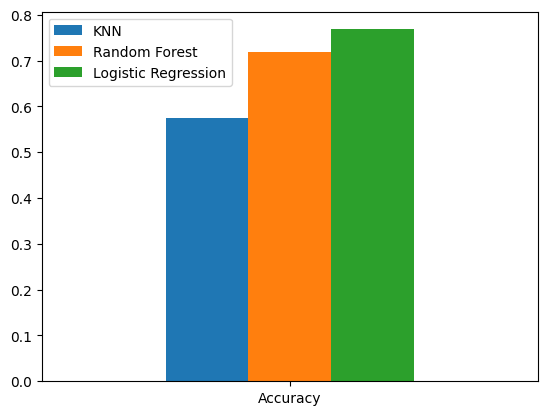

In [43]:
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.plot.bar()
plt.xticks(rotation = 0)

# Improving and Tuning the Model
    Universal Methods used for all Classification problems
    * Hyperparameters Tunning
    * Features Improving
    Advance Level
    * Confusion_Matrix
    * Cross_validation
    * Precision
    * Recall
    * F1
    * Classification Report
    * ROC Curve

* Hyperparameters Tunning
* Features Improving


In [51]:
#
train_score = []
test_score = []
#Create range to be test for n_neighbors
nneighbors = range(1,30)
# KNN Instance
KNN = KNeighborsClassifier()
#Looping through the range
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    #Run the fit for ith value
    KNN.fit(X_train,y_train)
    # update the training score
    train_score.append(KNN.score(X_train,y_train))
    # update the test score list
    test_score.append(KNN.score(X_test,y_test))


In [52]:
train_score

[1.0,
 0.819672131147541,
 0.8688524590163934,
 0.8032786885245902,
 0.8032786885245902,
 0.7540983606557377,
 0.8032786885245902,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.7049180327868853]

In [53]:
test_score

[0.5743801652892562,
 0.5867768595041323,
 0.5950413223140496,
 0.5867768595041323,
 0.5743801652892562,
 0.5867768595041323,
 0.5867768595041323,
 0.6239669421487604,
 0.6074380165289256,
 0.6157024793388429,
 0.6446280991735537,
 0.640495867768595,
 0.6652892561983471,
 0.6528925619834711,
 0.6776859504132231,
 0.6570247933884298,
 0.6735537190082644,
 0.6446280991735537,
 0.6776859504132231,
 0.6487603305785123,
 0.6694214876033058,
 0.6611570247933884,
 0.6694214876033058,
 0.6818181818181818,
 0.6983471074380165,
 0.7024793388429752,
 0.6859504132231405,
 0.6942148760330579,
 0.6735537190082644]

#### plot the Accuracy Score

Max KNN Score:70.25%


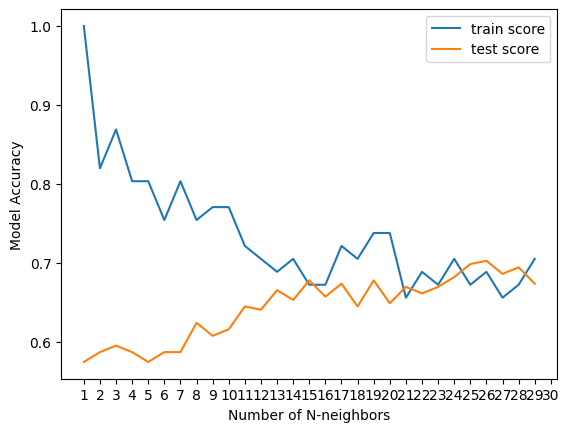

In [60]:
plt.plot(nneighbors,train_score,label='train score')
plt.plot(nneighbors,test_score,label='test score')
plt.xticks(np.arange(1,31,1))
plt.xlabel('Number of N-neighbors')
plt.ylabel('Model Accuracy')
plt.legend()
print(f'Max KNN Score:{max(test_score)*100:0.2f}%')

### Hyperparameter tunning using Randomized Search CV

* LogisticRegression()
* RandomForestClassifier()

In [63]:
#LogisticRegression hyperparameter
LR_hp = {'C':np.logspace(-4,4,20),
         'solver':['liblinear']}

In [64]:
#RandomforestClassifier hyperparameter
RFC_hp = {'n_estimators':np.arange(10,1600,100),
          'max_depth':[None,3,5,6,10],
          'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2)}

In [67]:
# Tune Logistic Regression
np.random.seed(7)
# Lets Use RSCV to tune HP
lr = RandomizedSearchCV(LogisticRegression(),
                        param_distributions=LR_hp,
                        cv=5,
                        n_iter=20,
                       verbose=True)
#fit the Random HP search model for LR
lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [69]:
lr.score(X_test,y_test)

0.7024793388429752

In [70]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.03359818286283781}

In [73]:
# Tune Random Forest Classifier
np.random.seed(7)
# Lets Use RSCV to tune HP
rfc = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=RFC_hp,
                        cv=5,
                        n_iter=20,
                       verbose=True)
#fit the Random HP search model for LR
rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [74]:
rfc.score(X_test,y_test)

0.7231404958677686

In [75]:
rfc.best_params_

{'n_estimators': 910,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_depth': None}

* 'KNN': 0.5743801652892562,
* 'Random Forest': 0.71900826446281,
* 'Logistic Regression': 0.768595041322314

In [76]:
# after hyper tuning of 'Logistic Regression :0.7024793388429752
#after hyper tuning of Random Forest : 0.7231404958677686

### Hyperparamameter by using Grid Search CV

In [78]:
np.random.seed(7)
# Lets Use RSCV to tune HP
lr_gs = GridSearchCV(LogisticRegression(),
                        param_grid=LR_hp,
                        cv=5,
                       verbose=True)
#fit the Random HP search model for LR
lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [79]:
lr_gs.score(X_test,y_test)

0.7024793388429752

In [ ]:
# Score of Logistic Regression :0.7024793388429752

In [80]:
lr_gs.best_params_

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [81]:
# Tune Random Forest Classifier using GSCV
np.random.seed(7)
# Lets Use RSCV to tune HP
rfc_gs = GridSearchCV(RandomForestClassifier(),
                        param_grid=RFC_hp,
                        cv=5,
                       verbose=True)
#fit the Random HP search model for LR
rfc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


KeyboardInterrupt: 

In [ ]:
rfc_gs.best_params_

In [ ]:
rfc_gs.score(X_test,y_test)

* 'KNN': 0.5743801652892562 after Improving = 0.5743801652892562
* 'Random Forest': 0.71900826446281 after improving = 0.7024793388429752
* 'Logistic Regression': 0.768595041322314 after improving = 0.7377049180327869

### Advanced Level
* ROC Curve
* Confusion_Matrix

In [105]:
# Plotting the Area under the curve.
y_predict = lr_gs.predict(X_test)
roc_curve(X_test,y_predict)

ValueError: continuous-multioutput format is not supported

In [106]:
# confusion Matrix
print(confusion_matrix(y_test,y_predict))

[[84 24]
 [48 86]]


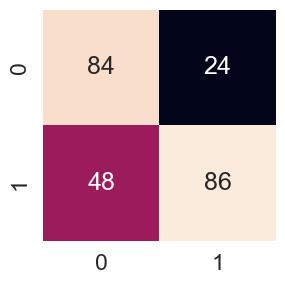

In [108]:
sns.set(font_scale=1.5)
def plot_confusion(y_test,y_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_predict),
                    annot=True,
                    cbar=False)
    
plot_confusion(y_test,y_predict)

In [109]:
# Classification Report (Class imbalance problem)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70       108
           1       0.78      0.64      0.70       134

    accuracy                           0.70       242
   macro avg       0.71      0.71      0.70       242
weighted avg       0.72      0.70      0.70       242



In [110]:
lr_gs.best_params_
lr = LogisticRegression(C=0.03359818286283781,solver='liblinear')

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [115]:
# Cross Validated Accuracy
cv_accuracy = cross_val_score(lr,X,y,cv=7,scoring='accuracy')
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8382663847780127

In [116]:
# Cross Validated precision
cv_precision = cross_val_score(lr,X,y,cv=7,scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.813526949241235

In [118]:
# Cross Validated recall
cv_recall = cross_val_score(lr,X,y,cv=7,scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.9143374741200828

In [119]:
# Cross Validated f-1
cv_f1 = cross_val_score(lr,X,y,cv=7,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.860098427649448

### Visualization the Cross Validated Matrixes

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1')])

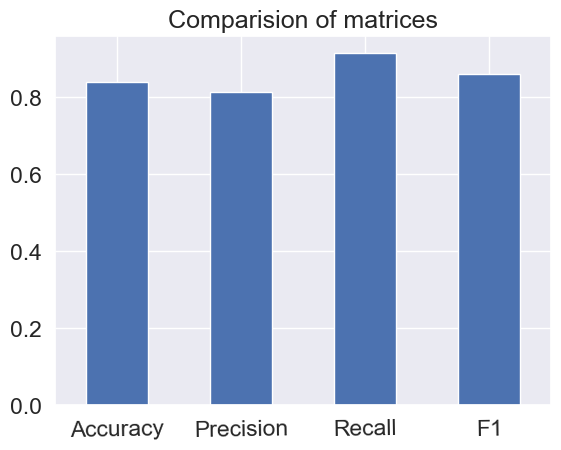

In [122]:
cv_plot = pd.DataFrame({
   'Accuracy': cv_accuracy,
    'Precision':cv_precision,
    'Recall':cv_recall,
    'F1':cv_f1
},index=[0])
cv_plot.T.plot.bar(title='Comparision of matrices',legend=False)
plt.xticks(rotation=True)

### Features Improving

In [123]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [128]:
### Check coffiecient
lr.fit(X_train,y_train)
lr.coef

Fitting 5 folds for each of 20 candidates, totalling 100 fits


AttributeError: 'RandomizedSearchCV' object has no attribute 'coef'